In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import datetime as dt

In [54]:
dfx = pd.read_excel('/content/drive/MyDrive/EDMI/compsaa_file2_20200701_20201231.xlsx').loc[lambda d: d.total_comment_num.notnull()]
dfx.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0


In [55]:
# copy the dataframe to an alias
dd = dfx

In [56]:
dd.shape

(381619, 6)

In [15]:
convert_x_dates = lambda i: dt.datetime.strptime( str(i), "%Y%m%d.0")

In [16]:
dfx = dfx.assign(date_joiner=lambda d: d.date_key.apply(convert_x_dates))

In [17]:
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key,date_joiner
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0,2021-10-05
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0,2020-12-25
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0,2021-11-02
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0,2021-05-08
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0,2021-10-19


In [18]:
ddd = dfx

In [7]:
# groupBy = 'SKU'
dfx = dfx.groupby('sku')
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key,date_joiner
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0,2021-10-05
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0,2020-12-25
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0,2021-11-02
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0,2021-05-08
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0,2021-10-19
...,...,...,...,...,...,...,...
1048517,10030291463432,贝特佳 蓓诺臻羊奶粉婴幼儿配方奶粉200克罐装 2段（6-12月）200克,NaN,NaN,0.0,20210509.0,2021-05-09
1048529,10033199327936,良品优品代餐奶昔同款高饱腹食品热量网红燃晚早餐6味网红 懒人爱牌2瓶装-抹茶口味,NaN,NaN,0.0,20210718.0,2021-07-18
1048560,46052834641,完达山奶粉菁采安力聪婴幼儿配方奶粉3段900克罐装三段宝宝牛奶粉（12-36个月婴幼儿适用） 1罐,NaN,NaN,113.0,20210201.0,2021-02-01
1048561,100013570603,飞鹤臻爱倍护超级飞帆 幼儿配方奶粉 3段(12-36个月幼儿适用)300克*5罐,NaN,NaN,557.0,20210918.0,2021-09-18


```
res = dfx.groupby('sku', as_index = False)['total_comment_num'].apply(lambda x: len(x) == len(x.unique()) and x.is_monotonic)
print(res)
````

In [45]:
res = dfx.groupby('sku', as_index = False)['total_comment_num'].apply(lambda x: x.is_monotonic)
print(res)

                  sku  total_comment_num
0              252591              False
1              255751              False
2              270669              False
3              270673              False
4              283596              False
...               ...                ...
74095  10042556890612               True
74096  10042556896876               True
74097  10042556896877               True
74098  10042556896878               True
74099  10042556906673               True

[74100 rows x 2 columns]


In [49]:
true_counter = 0
false_counter = 0
for i in res['total_comment_num']:
  if i == True:
    true_counter = true_counter + 1
  else:
    false_counter = false_counter+1

print(f'Total True Values:' , true_counter)
print(f'Total False Values:', false_counter)

Total True Values: 43803
Total False Values: 30297


In [33]:
daaad = dfx.groupby('sku').apply(lambda s: s['total_comment_num'].is_monotonic).pipe(lambda d: print(d.sum()))
print(daaad)

43803
None


In [35]:
daaad = dfx.groupby('sku').apply(lambda s: s['total_comment_num'].is_monotonic).pipe(lambda d: print(d.shape[0]))
print(daaad)

74100
None


In [52]:
daaad = dfx.groupby('sku').apply(lambda s: s['total_comment_num'].is_monotonic).pipe(lambda d: d.sum()/d.shape[0])
print(f"The Percentage of True/Total",daaad*100)

The Percentage of True/Total 59.113360323886646


In [ ]:
## Evan's Code
import pandas as pd
import datetime as dt

convert_x_dates = lambda i: dt.datetime.strptime( str(i), "%Y%m%d.0")

## read & prep dataframe
df = (pd.read_excel('./data/compsaa_file2_20200701_20201231.xlsx')
     .loc[lambda d: d.total_comment_num.notnull()]
     .assign(date_joiner=lambda d: d.date_key.apply(convert_x_dates))
)

## test monotonic increasing by sku
print(df
 .sort_values(['sku', 'date_joiner'])
 .groupby('sku')['total_comment_num']
 .apply(lambda s: s.is_monotonic)
 .pipe(lambda d: d.sum() / d.shape[0])
)

#### Plot

In [57]:
import matplotlib.pyplot as plt

In [53]:
print(len(dfx['sku'].unique()))

74100


In [64]:
# make group
ppdd2 = dfx.groupby('sku')
ppdd2.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0
...,...,...,...,...,...,...
1048517,10030291463432,贝特佳 蓓诺臻羊奶粉婴幼儿配方奶粉200克罐装 2段（6-12月）200克,NaN,NaN,0.0,20210509.0
1048529,10033199327936,良品优品代餐奶昔同款高饱腹食品热量网红燃晚早餐6味网红 懒人爱牌2瓶装-抹茶口味,NaN,NaN,0.0,20210718.0
1048560,46052834641,完达山奶粉菁采安力聪婴幼儿配方奶粉3段900克罐装三段宝宝牛奶粉（12-36个月婴幼儿适用） 1罐,NaN,NaN,113.0,20210201.0
1048561,100013570603,飞鹤臻爱倍护超级飞帆 幼儿配方奶粉 3段(12-36个月幼儿适用)300克*5罐,NaN,NaN,557.0,20210918.0


In [63]:
ppdd1 = dfx
ppdd1.shape
ppdd1.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0


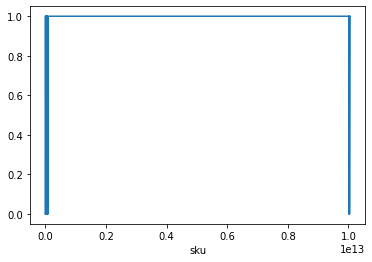

In [60]:
ppdd1 = res.groupby('sku').apply(lambda s: s['total_comment_num'].is_monotonic)

In [65]:
ret = res

In [67]:
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0


In [68]:
dfx.shape

(381619, 6)

In [72]:
dfx['total_comment_num'].isnull().sum()

0

In [66]:
# Create dataframe for ploting false values

df_pp = ret.loc[ret['total_comment_num'] == False]
df_pp.head()

,sku,total_comment_num
0,252591,False
1,255751,False
2,270669,False
3,270673,False
4,283596,False


In [73]:
aa = dfx.loc[lambda d: d.total_comment_num.notnull()]
aa.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0


In [74]:
aa.shape

(381619, 6)

In [85]:
aa1 = aa

In [86]:
aa1 = aa1.groupby('sku')
print(len(aa1))
print(aa1.head())

74100
                    sku                                       product_name  \
0          100021558806  爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...   
1        10022644635456                     【现货】美国Edward & Sons有 机椰丝烘焙227g   
3           43541408544              京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口   
4           55514902865  【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...   
7               7425800  雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...   
...                 ...                                                ...   
1048517  10030291463432              贝特佳 蓓诺臻羊奶粉婴幼儿配方奶粉200克罐装 2段（6-12月）200克   
1048529  10033199327936           良品优品代餐奶昔同款高饱腹食品热量网红燃晚早餐6味网红 懒人爱牌2瓶装-抹茶口味   
1048560     46052834641  完达山奶粉菁采安力聪婴幼儿配方奶粉3段900克罐装三段宝宝牛奶粉（12-36个月婴幼儿适用） 1罐   
1048561    100013570603           飞鹤臻爱倍护超级飞帆 幼儿配方奶粉 3段(12-36个月幼儿适用)300克*5罐   
1048562  10031514484909        原装进口ozcow奶粉速溶全脂脱脂澳洲成人澳大利亚金可澳1000g 一袋蓝色全脂+菌粉   

         monthly_sales_qty  total_sales_qty  total_commen

In [77]:
len(aa1)

74100

In [78]:
aa1.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0
7,7425800,雅培(Abbott)Eleva菁挚纯净幼儿配方奶粉 3段900克*3 天然纯净礼盒（新老包装...,NaN,NaN,7178.0,20211019.0
...,...,...,...,...,...,...
1048517,10030291463432,贝特佳 蓓诺臻羊奶粉婴幼儿配方奶粉200克罐装 2段（6-12月）200克,NaN,NaN,0.0,20210509.0
1048529,10033199327936,良品优品代餐奶昔同款高饱腹食品热量网红燃晚早餐6味网红 懒人爱牌2瓶装-抹茶口味,NaN,NaN,0.0,20210718.0
1048560,46052834641,完达山奶粉菁采安力聪婴幼儿配方奶粉3段900克罐装三段宝宝牛奶粉（12-36个月婴幼儿适用） 1罐,NaN,NaN,113.0,20210201.0
1048561,100013570603,飞鹤臻爱倍护超级飞帆 幼儿配方奶粉 3段(12-36个月幼儿适用)300克*5罐,NaN,NaN,557.0,20210918.0


In [ ]:
ggfadfa = dfx.groupby('sku').apply(lambda s: s['total_comment_num'].is_monotonic)

In [92]:
aa2 = aa.groupby('sku')['total_comment_num'].agg(['unique'])
aa2.head()

,unique
sku,
252591,"[609829.0, 608548.0, 558161.0]"
255751,"[285249.0, 246741.0, 237289.0, 230652.0, 25166..."
270669,"[306452.0, 317929.0, 252131.0, 300887.0, 29067..."
270673,"[268602.0, 197260.0, 299908.0, 256842.0, 19564..."
283596,"[175424.0, 138147.0, 140513.0, 137459.0, 18588..."


In [95]:
df_pp1 = dfx.loc[dfx['sku'] == 252591]
df_pp1.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
10163,252591,雅培(Abbott)小安素全营养配方粉香草味(1-10岁)900克(新加坡原装进口)（新老包...,NaN,NaN,609829.0,20210102.0
258920,252591,雅培(Abbott)小安素全营养配方粉香草味(1-10岁)900克(新加坡原装进口)（新老包...,NaN,NaN,608548.0,20201224.0
948670,252591,雅培(Abbott)小安素全营养配方粉香草味(1-10岁)900克(新加坡原装进口)（新老包...,NaN,NaN,558161.0,20200807.0


In [ ]:
sku_uq = dfx['sku'].unique().tolist()
len(s)